## Notes 
### Required installing Oracle JAVA 8 to get javabridge installed
### Then, I was able to install py-causal from https://bd2kccd.github.io/docs/py-causal/
### GFCI is slower than RFCI, but more accurate (SPIRTES), GFCI and RFCI account for unobserved variables, FGES assumes no unobserved variables.

Structure Learning Performance Guarantees If the assumptions in the previous section hold, then in the large sample limit, the CBN structure output by GFCId will contain an edge of one of four kinds between Xand Y   if and only if Xand Yare not independent conditional on any subset of the other measured variables of less than or equal to a specified size. In addition, there is (1) an arc X->Y   if and only if Xdirectly or indirectly causes Y, and Y   does not directly or indirectly cause X; (2) an edge X <-->Y   if and only if X   is not a direct or indirect cause of Yand Y   is not a direct or indirect cause of X(which can only occur if there are latent confounders of Xand some other variable or Yand some other variable; (3) an edge Xo->Y   only if Yis not a direct or indirect cause of X, but Xmay or may not be an indirect cause of Y; (4) an edge X o–o Y   indicates that Xand Y   are dependent no matter what subset of observed variables is conditioned on, but contains no orientation information (X   may be a direct or indirect cause of Y, and Ymay be an indirect cause of X, or there may be a latent common cause of Xand Y.

In [ ]:
# This is for continous data.
# generate some toy data:
SIZE = 20000
a = np.random.normal(size=SIZE, scale = 1)
b = np.random.normal(size=SIZE, scale = 1)
c = np.random.normal(size=SIZE, scale = 1)
d = np.random.normal(size=SIZE, scale = 1)
e = np.random.normal(size=SIZE, scale = 1)

f= a + b + c + d + e + np.random.normal(size=SIZE, scale = 1)
g = f + np.random.normal(size=SIZE, scale = 1)

# load the data into a dataframe:
df = pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})
import pandas as pd
from pycausal.pycausal import pycausal as pc
from pycausal import search as s
pc = pc()
pc.start_vm(java_max_heap_size = '500M')
from pycausal import prior as p

tetrad = s.tetradrunner()
#GFCI = Greedy Fast Causal Interference (GFCI) 
# bdeu = Bayesian Dirichlet likelihood equivalence and uniform
tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)

import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)




In [ ]:
# let's try and predict D HERE

# This is for continous data.
# generate some toy data:
SIZE = 100000
a = np.random.normal(size=SIZE, scale = 1)
b = np.random.normal(size=SIZE, scale = 1)
c = np.random.normal(size=SIZE, scale = 1)
d = a + b + c + np.random.normal(size=SIZE, scale = 1)
e = d + np.random.normal(size=SIZE, scale = 1)
f= d + np.random.normal(size=SIZE, scale = 1)
g = d + np.random.normal(size=SIZE, scale = 1)

# load the data into a dataframe:
df = pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})
import pandas as pd
from pycausal.pycausal import pycausal as pc
from pycausal import search as s
pc = pc()
pc.start_vm(java_max_heap_size = '2500M')
from pycausal import prior as p

tetrad = s.tetradrunner()
#GFCI = Greedy Fast Causal Interference (GFCI) 
# bdeu = Bayesian Dirichlet likelihood equivalence and uniform
tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)

import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

In [ ]:
pc = pc()
pc.start_vm(java_max_heap_size = '500M')
from pycausal import prior as p

tetrad = s.tetradrunner()
#GFCI = Greedy Fast Causal Interference (GFCI) 
# bdeu = Bayesian Dirichlet likelihood equivalence and uniform
tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)

import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
print(len(graphs))
svg_str = graphs[0].create_svg()
SVG(svg_str)

# Trying some various ML models

In [1]:
#Synthetic data
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import pydot
from IPython.display import SVG

def gen_data():
    SIZE = 10000
    a = np.random.binomial(2, 0.5, size=SIZE)
    b = np.random.binomial(2, 0.5, size=SIZE)
    c = np.random.binomial(2, 0.5, size=SIZE)
    d = np.random.binomial(2, 0.5, size=SIZE)
    e = np.random.binomial(2, 0.5, size=SIZE)
    f= a + b + c + d + e + np.random.binomial(2, 0.5, size=SIZE)
    g = f + np.random.binomial(2, 0.5, size=SIZE)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})


import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

def discrete_gauss(low, high, samples, std = 20):
    x = np.arange(low, high)
    xU, xL = x + 0.5, x - 0.5 
    prob = ss.norm.cdf(xU, scale = std) - ss.norm.cdf(xL, scale = std)
    prob = prob / prob.sum() #normalize the probabilities so their sum is 1
    nums = np.random.choice(x, size = samples, p = prob)
    return nums

def gen_data():
    SIZE = 40000
    a = discrete_gauss(-3,3, SIZE)
    b = discrete_gauss(-3,3, SIZE)
    c = discrete_gauss(-3,3, SIZE)
    d = discrete_gauss(-3,3, SIZE)
    e = discrete_gauss(-3,3, SIZE)
    f= a + b + c + d + e + np.random.binomial(2, 0.5, size=SIZE)
    g = f + discrete_gauss(-3,3, SIZE)

    #g[g < 0] = 0
    #g[g > 0] = 1
    #g[(g <= 3) & (g >= -3)] = 1
    #g[g < -3] = 0
    #g[g > 3] = 2
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

def gen_data():
    #SIZE = 40000
    SIZE = 40000
    a = np.random.normal(0, 1, SIZE)
    b = np.random.normal(0, 1, SIZE)
    c = np.random.normal(0, 1, SIZE)
    d = np.random.normal(0, 1, SIZE)
    e = np.random.normal(0, 1, SIZE)
    f= a + b + c + d + e + np.random.normal(0, 1, SIZE)
    g = f + np.random.normal(0, 1, SIZE)
    g = np.rint(g)
    #m = np.mean(g)
    #g[g < m] = 0
    #g[g >= m] = 1

    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

df = gen_data()



import numpy as np
import matplotlib.pyplot as plt


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)


Error: LogisticRegression() 0.2702169625246548


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.20512820512820512
Error: DecisionTreeClassifier() 0.2583826429980276
Error: LinearSVC() 0.2958579881656805
Error: GaussianNB() 0.3530571992110454
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.252465483234714
Error: LinearDiscriminantAnalysis() 0.3609467455621302
Error: RandomForestClassifier() 0.3096646942800789
Violation: {'f'} {'d', 'c', 'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: ExtraTreesClassifier() 0.2968441814595661
Error: AdaBoostClassifier() 0.28205128205128205
Error: BaggingClassifier() 0.3175542406311637
Error: GradientBoostingClassifier() 0.35700197238658776
Error: MLPClassifier() 0.35009861932938857
Error: LogisticRegression() 0.27964426877470355


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.208498023715415
Violation: {'f'} {'a', 'f', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.2727272727272727
Error: LinearSVC() 0.3102766798418972
Error: GaussianNB() 0.3685770750988142
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.24703557312252963
Error: LinearDiscriminantAnalysis() 0.3606719367588933
Error: RandomForestClassifier() 0.3241106719367589
Error: ExtraTreesClassifier() 0.33300395256917
Error: AdaBoostClassifier() 0.2737154150197628
Error: BaggingClassifier() 0.3102766798418972
Error: GradientBoostingClassifier() 0.3695652173913043
Error: MLPClassifier() 0.3567193675889328
Error: LogisticRegression() 0.2943508424182359


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.16551040634291378
Error: DecisionTreeClassifier() 0.25966303270564917
Error: LinearSVC() 0.3240832507433102
Error: GaussianNB() 0.34985133795837464
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.22299306243805747


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.36967294350842417
Error: RandomForestClassifier() 0.3062438057482656
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: ExtraTreesClassifier() 0.28543111992071357
Error: AdaBoostClassifier() 0.25173439048562934
Error: BaggingClassifier() 0.3012884043607532
Error: GradientBoostingClassifier() 0.3607532210109019
Error: MLPClassifier() 0.36967294350842417
Error: LogisticRegression() 0.2705649157581764
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1605550049554014
Error: DecisionTreeClassifier() 0.2705649157581764
Error: LinearSVC() 0.31714568880079286
Error: GaussianNB() 0.39544103072348863
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.2566897918731417


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.400396432111001
Error: RandomForestClassifier() 0.3260654112983152
Error: ExtraTreesClassifier() 0.31020812685827553
Error: AdaBoostClassifier() 0.27651139742319125
Error: BaggingClassifier() 0.3409316154608523
Error: GradientBoostingClassifier() 0.37561942517343905
Error: MLPClassifier() 0.3815659068384539
Violation: {'f'} {'a', 'e', 'f', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.2705649157581764


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.19127849355797819
Violation: {'f'} {'a', 'd', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.27750247770069375
Error: LinearSVC() 0.3002973240832507
Error: GaussianNB() 0.37165510406342916
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.2556987115956392


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.38453914767096137
Error: RandomForestClassifier() 0.3012884043607532
Error: ExtraTreesClassifier() 0.30921704658077304
Error: AdaBoostClassifier() 0.2626362735381566
Error: BaggingClassifier() 0.3191278493557978
Error: GradientBoostingClassifier() 0.35678889990089196
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: MLPClassifier() 0.38057482656095143
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.2644135188866799


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.15705765407554673
Error: DecisionTreeClassifier() 0.2783300198807157
Error: LinearSVC() 0.3111332007952286
Error: GaussianNB() 0.33399602385685884
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.24254473161033796
Error: LinearDiscriminantAnalysis() 0.34095427435387676
Error: RandomForestClassifier() 0.2753479125248509
Violation: {'f'} {'d', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: ExtraTreesClassifier() 0.28926441351888665
Error: AdaBoostClassifier() 0.2485089463220676
Error: BaggingClassifier() 0.31809145129224653
Error: GradientBoostingClassifier() 0.34393638170974156
Error: MLPClassifier() 0.3379721669980119
Error: LogisticRegression() 0.26043737574552683


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.21570576540755468
Error: DecisionTreeClassifier() 0.2823061630218688
Error: LinearSVC() 0.29721669980119286
Error: GaussianNB() 0.37475149105367794
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.24751491053677932
Error: LinearDiscriminantAnalysis() 0.3827037773359841
Error: RandomForestClassifier() 0.30019880715705766
Error: ExtraTreesClassifier() 0.28429423459244535
Error: AdaBoostClassifier() 0.2614314115308151
Error: BaggingClassifier() 0.28926441351888665
Error: GradientBoostingClassifier() 0.3667992047713718
Error: MLPClassifier() 0.378727634194831
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.24378109452736318


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.20398009950248755
Error: DecisionTreeClassifier() 0.272636815920398
Error: LinearSVC() 0.2965174129353234
Error: GaussianNB() 0.36716417910447763
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.2656716417910448
Error: LinearDiscriminantAnalysis() 0.3701492537313433
Error: RandomForestClassifier() 0.3253731343283582
Error: ExtraTreesClassifier() 0.2955223880597015
Error: AdaBoostClassifier() 0.2716417910447761
Error: BaggingClassifier() 0.3283582089552239
Error: GradientBoostingClassifier() 0.3661691542288557
Error: MLPClassifier() 0.3761194029850746
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.24477611940298508


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.16616915422885573
Error: DecisionTreeClassifier() 0.27562189054726366
Error: LinearSVC() 0.28955223880597014
Error: GaussianNB() 0.37512437810945276
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.2626865671641791
Error: LinearDiscriminantAnalysis() 0.3800995024875622
Error: RandomForestClassifier() 0.33134328358208953
Error: ExtraTreesClassifier() 0.30845771144278605
Error: AdaBoostClassifier() 0.27064676616915423
Error: BaggingClassifier() 0.32039800995024875
Error: GradientBoostingClassifier() 0.37910447761194027
Error: MLPClassifier() 0.3572139303482587
Error: LogisticRegression() 0.25970149253731345


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2099502487562189
Violation: {'f'} {'f', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.26666666666666666
Error: LinearSVC() 0.29950248756218906
Error: GaussianNB() 0.3582089552238806
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.24577114427860697
Error: LinearDiscriminantAnalysis() 0.3701492537313433
Error: RandomForestClassifier() 0.3034825870646766
Error: ExtraTreesClassifier() 0.29950248756218906
Error: AdaBoostClassifier() 0.24875621890547264
Error: BaggingClassifier() 0.32935323383084575
Error: GradientBoostingClassifier() 0.35522388059701493
Error: MLPClassifier() 0.36318407960199006
Error: LogisticRegression() 0.24975124378109453
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.23184079601990049
Violation: {'f'} {'d', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.27064676616915423
Error: LinearSVC() 0.27860696517412936
Error: GaussianNB() 0.3661691542288557
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.23781094527363184
Error: LinearDiscriminantAnalysis() 0.37512437810945276
Error: RandomForestClassifier() 0.2855721393034826
Error: ExtraTreesClassifier() 0.2736318407960199
Error: AdaBoostClassifier() 0.25970149253731345
Error: BaggingClassifier() 0.29054726368159206
Error: GradientBoostingClassifier() 0.3611940298507463
Error: MLPClassifier() 0.3592039800995025
Violation: {'f'} {'a', 'd', 'f', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.25870646766169153


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.17114427860696518
Error: DecisionTreeClassifier() 0.2855721393034826
Error: LinearSVC() 0.28756218905472636
Error: GaussianNB() 0.3482587064676617
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.21393034825870647
Error: LinearDiscriminantAnalysis() 0.3522388059701492
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: RandomForestClassifier() 0.3034825870646766
Error: ExtraTreesClassifier() 0.2845771144278607
Error: AdaBoostClassifier() 0.25970149253731345
Error: BaggingClassifier() 0.29253731343283584
Error: GradientBoostingClassifier() 0.3353233830845771
Error: MLPClassifier() 0.35522388059701493
Error: LogisticRegression() 0.28955223880597014


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.16318407960199005
Violation: {'f'} {'d'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.2656716417910448
Error: LinearSVC() 0.309452736318408
Error: GaussianNB() 0.36716417910447763
Violation: {'f'} {'a', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.24477611940298508
Error: LinearDiscriminantAnalysis() 0.36716417910447763
Error: RandomForestClassifier() 0.28059701492537314
Error: ExtraTreesClassifier() 0.2855721393034826
Error: AdaBoostClassifier() 0.27064676616915423
Error: BaggingClassifier() 0.3024875621890547
Error: GradientBoostingClassifier() 0.34427860696517415
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: MLPClassifier() 0.36019900497512436
Error: LogisticRegression() 0.28286852589641437


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.17729083665338646
Error: DecisionTreeClassifier() 0.2589641434262948
Error: LinearSVC() 0.3197211155378486
Error: GaussianNB() 0.3794820717131474
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.2450199203187251
Error: LinearDiscriminantAnalysis() 0.3934262948207171
Error: RandomForestClassifier() 0.31274900398406374
Error: ExtraTreesClassifier() 0.30677290836653387
Error: AdaBoostClassifier() 0.2729083665338645
Error: BaggingClassifier() 0.3237051792828685
Error: GradientBoostingClassifier() 0.38147410358565736
Error: MLPClassifier() 0.38745019920318724
Error: LogisticRegression() 0.2868525896414343


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1553784860557769
Error: DecisionTreeClassifier() 0.26593625498007967
Error: LinearSVC() 0.30776892430278885
Error: GaussianNB() 0.3854581673306773
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.2340637450199203
Error: LinearDiscriminantAnalysis() 0.399402390438247
Error: RandomForestClassifier() 0.3256972111553785
Error: ExtraTreesClassifier() 0.2918326693227092
Error: AdaBoostClassifier() 0.27091633466135456
Error: BaggingClassifier() 0.3147410358565737
Error: GradientBoostingClassifier() 0.3834661354581673
Error: MLPClassifier() 0.39741035856573703
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.2811565304087737


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.15054835493519442
Error: DecisionTreeClassifier() 0.2711864406779661
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LinearSVC() 0.3040877367896311
Error: GaussianNB() 0.37886340977068794
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.23928215353938184
Error: LinearDiscriminantAnalysis() 0.36390827517447655
Error: RandomForestClassifier() 0.2951146560319043
Error: ExtraTreesClassifier() 0.27916251246261214
Error: AdaBoostClassifier() 0.26520438683948155
Error: BaggingClassifier() 0.3220338983050847
Error: GradientBoostingClassifier() 0.353938185443669
Error: MLPClassifier() 0.36490528414755735
Error: LogisticRegression() 0.27345309381237526


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.20359281437125748
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.2465069860279441
Error: LinearSVC() 0.3073852295409182
Error: GaussianNB() 0.34830339321357284
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.23952095808383234
Error: LinearDiscriminantAnalysis() 0.3463073852295409
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: RandomForestClassifier() 0.27944111776447106
Error: ExtraTreesClassifier() 0.282435129740519
Error: AdaBoostClassifier() 0.2694610778443114
Error: BaggingClassifier() 0.27045908183632733
Error: GradientBoostingClassifier() 0.3373253493013972
Error: MLPClassifier() 0.3592814371257485
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.2777222777222777


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.21478521478521478
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.26673326673326675
Error: LinearSVC() 0.2937062937062937
Error: GaussianNB() 0.3826173826173826
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.25774225774225773
Error: LinearDiscriminantAnalysis() 0.3876123876123876
Error: RandomForestClassifier() 0.3196803196803197
Error: ExtraTreesClassifier() 0.2907092907092907
Error: AdaBoostClassifier() 0.27672327672327673
Error: BaggingClassifier() 0.3176823176823177
Error: GradientBoostingClassifier() 0.38161838161838163
Error: MLPClassifier() 0.3946053946053946
Error: LogisticRegression() 0.27672327672327673


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.18981018981018982
Error: DecisionTreeClassifier() 0.26573426573426573
Error: LinearSVC() 0.3146853146853147
Error: GaussianNB() 0.36163836163836166
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.24175824175824176
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LinearDiscriminantAnalysis() 0.37362637362637363
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: RandomForestClassifier() 0.3166833166833167
Error: ExtraTreesClassifier() 0.31868131868131866
Error: AdaBoostClassifier() 0.2707292707292707
Error: BaggingClassifier() 0.3106893106893107
Error: GradientBoostingClassifier() 0.35864135864135865
Error: MLPClassifier() 0.3706293706293706
Error: LogisticRegression() 0.262


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.158
Violation: {'f'} {'d', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.273
Error: LinearSVC() 0.303
Error: GaussianNB() 0.369
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.258
Error: LinearDiscriminantAnalysis() 0.373
Error: RandomForestClassifier() 0.309
Error: ExtraTreesClassifier() 0.299
Error: AdaBoostClassifier() 0.26
Error: BaggingClassifier() 0.3
Error: GradientBoostingClassifier() 0.354
Error: MLPClassifier() 0.358
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.27


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.123
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.281
Error: LinearSVC() 0.317
Error: GaussianNB() 0.363
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.254
Error: LinearDiscriminantAnalysis() 0.384
Error: RandomForestClassifier() 0.327
Error: ExtraTreesClassifier() 0.306
Error: AdaBoostClassifier() 0.274
Error: BaggingClassifier() 0.324
Error: GradientBoostingClassifier() 0.359
Error: MLPClassifier() 0.375
Violation: {'f'} {'a', 'd', 'f', 'c', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.2652652652652653


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.19519519519519518
Error: DecisionTreeClassifier() 0.24124124124124124
Error: LinearSVC() 0.3013013013013013
Error: GaussianNB() 0.37737737737737737
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.26426426426426425
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LinearDiscriminantAnalysis() 0.3763763763763764
Error: RandomForestClassifier() 0.32732732732732733
Error: ExtraTreesClassifier() 0.3013013013013013
Error: AdaBoostClassifier() 0.2732732732732733
Error: BaggingClassifier() 0.32932932932932935
Error: GradientBoostingClassifier() 0.3613613613613614
Error: MLPClassifier() 0.3713713713713714
Error: LogisticRegression() 0.2685370741482966
Violation: {'f'} {'e', 'f', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: Perceptron() 0.10821643286573146


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.29158316633266534
Error: LinearSVC() 0.30561122244488975
Error: GaussianNB() 0.3787575150300601
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.26152304609218435
Error: LinearDiscriminantAnalysis() 0.3847695390781563
Error: RandomForestClassifier() 0.312625250501002
Error: ExtraTreesClassifier() 0.3186372745490982
Error: AdaBoostClassifier() 0.27655310621242485
Error: BaggingClassifier() 0.3336673346693387
Error: GradientBoostingClassifier() 0.3687374749498998
Error: MLPClassifier() 0.3837675350701403
Error: LogisticRegression() 0.2858575727181545
Violation: {'e', 'f'} {'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2316950852557673
Violation: {'e', 'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.275827482447342
Violation: {'e', 'f'} {'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LinearSVC() 0.3139418254764293
Violation: {'e', 'f'} {'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: GaussianNB() 0.3881644934804413
Violation: {'e', 'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.22567703109327983
Violation: {'e', 'f'} {'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LinearDiscriminantAnalysis() 0.39117352056168503


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Violation: {'e', 'f'} {'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: RandomForestClassifier() 0.3039117352056169
Violation: {'e', 'f'} {'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: ExtraTreesClassifier() 0.29989969909729186
Violation: {'e', 'f'} {'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: AdaBoostClassifier() 0.26479438314944836
Violation: {'e', 'f'} {'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BaggingClassifier() 0.3239719157472417
Violation: {'e', 'f'} {'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: GradientBoostingClassifier() 0.36609829488465395
Violation: {'e', 'f'} {'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: MLPClassifier() 0.3630892678034102
Violation: {'e', 'f'} {'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.2948846539618857


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2136409227683049
Error: DecisionTreeClassifier() 0.2748244734202608
Error: LinearSVC() 0.3159478435305918
Error: GaussianNB() 0.36609829488465395
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.24473420260782347


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.3691073219658977
Violation: {'f'} {'a', 'd', 'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: RandomForestClassifier() 0.30792377131394183
Error: ExtraTreesClassifier() 0.316950852557673
Error: AdaBoostClassifier() 0.2657973921765296
Error: BaggingClassifier() 0.31093279839518556
Error: GradientBoostingClassifier() 0.35005015045135407
Error: MLPClassifier() 0.3650952858575727
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.2748244734202608


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.21865596790371114
Violation: {'f'} {'f', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.26278836509528586
Error: LinearSVC() 0.30090270812437314
Error: GaussianNB() 0.3811434302908726
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.23069207622868607


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.3831494483450351
Error: RandomForestClassifier() 0.3239719157472417
Error: ExtraTreesClassifier() 0.3139418254764293
Error: AdaBoostClassifier() 0.2848545636910732
Error: BaggingClassifier() 0.3039117352056169
Error: GradientBoostingClassifier() 0.3711133400200602
Error: MLPClassifier() 0.38515546639919757
Error: LogisticRegression() 0.2793969849246231
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1678391959798995
Error: DecisionTreeClassifier() 0.27738693467336684
Error: LinearSVC() 0.30452261306532663
Error: GaussianNB() 0.3698492462311558
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.24723618090452262
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LinearDiscriminantAnalysis() 0.3708542713567839
Error: RandomForestClassifier() 0.2964824120603015
Error: ExtraTreesClassifier() 0.30251256281407035
Error: AdaBoostClassifier() 0.26532663316582916
Error: BaggingClassifier() 0.3075376884422111
Error: GradientBoostingClassifier() 0.35577889447236183
Error: MLPClassifier() 0.36381909547738694
Error: LogisticRegression() 0.26532663316582916


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.22914572864321608
Error: DecisionTreeClassifier() 0.2804020100502513
Error: LinearSVC() 0.2984924623115578
Error: GaussianNB() 0.37386934673366834
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.2371859296482412
Error: LinearDiscriminantAnalysis() 0.36683417085427134
Error: RandomForestClassifier() 0.3155778894472362
Error: ExtraTreesClassifier() 0.3005025125628141
Error: AdaBoostClassifier() 0.264321608040201
Error: BaggingClassifier() 0.3155778894472362
Error: GradientBoostingClassifier() 0.36180904522613067
Error: MLPClassifier() 0.38090452261306534
Error: LogisticRegression() 0.2595573440643863


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.15995975855130784
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.27565392354124746
Error: LinearSVC() 0.3158953722334004
Error: GaussianNB() 0.3702213279678068
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.23641851106639838
Error: LinearDiscriminantAnalysis() 0.3611670020120724
Error: RandomForestClassifier() 0.2917505030181087
Error: ExtraTreesClassifier() 0.28470824949698187
Error: AdaBoostClassifier() 0.27062374245472837
Error: BaggingClassifier() 0.289738430583501
Error: GradientBoostingClassifier() 0.3682092555331992
Error: MLPClassifier() 0.3420523138832998
Error: LogisticRegression() 0.2716297786720322


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2062374245472837
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.2947686116700201
Error: LinearSVC() 0.2947686116700201
Error: GaussianNB() 0.3702213279678068
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.23843058350100604
Error: LinearDiscriminantAnalysis() 0.3702213279678068
Error: RandomForestClassifier() 0.3118712273641851
Error: ExtraTreesClassifier() 0.3299798792756539
Error: AdaBoostClassifier() 0.2545271629778672
Error: BaggingClassifier() 0.3209255533199195
Error: GradientBoostingClassifier() 0.358148893360161
Error: MLPClassifier() 0.3611670020120724
Error: LogisticRegression() 0.2676056338028169


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2152917505030181
Error: DecisionTreeClassifier() 0.2776659959758551
Error: LinearSVC() 0.3008048289738431
Error: GaussianNB() 0.36519114688128773
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.24849094567404426
Error: LinearDiscriminantAnalysis() 0.3682092555331992
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: RandomForestClassifier() 0.2987927565392354
Error: ExtraTreesClassifier() 0.2837022132796781
Error: AdaBoostClassifier() 0.27364185110663986
Error: BaggingClassifier() 0.31086519114688127
Error: GradientBoostingClassifier() 0.3501006036217304
Error: MLPClassifier() 0.3702213279678068
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.2605633802816901


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.18309859154929578
Error: DecisionTreeClassifier() 0.2625754527162978
Error: LinearSVC() 0.29577464788732394
Error: GaussianNB() 0.38329979879275655
Violation: {'f'} {'a', 'd', 'f', 'c', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.24346076458752516
Error: LinearDiscriminantAnalysis() 0.3641851106639839
Error: RandomForestClassifier() 0.3028169014084507
Error: ExtraTreesClassifier() 0.28772635814889336
Error: AdaBoostClassifier() 0.2665995975855131
Error: BaggingClassifier() 0.3148893360160966
Error: GradientBoostingClassifier() 0.36016096579476864
Error: MLPClassifier() 0.3682092555331992
Error: LogisticRegression() 0.2618328298086606


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.21953675730110775
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.2719033232628399
Error: LinearSVC() 0.3162134944612286
Error: GaussianNB() 0.364551863041289
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.2457200402819738
Error: LinearDiscriminantAnalysis() 0.3716012084592145
Error: RandomForestClassifier() 0.31017119838872104
Error: ExtraTreesClassifier() 0.2980866062437059
Error: AdaBoostClassifier() 0.2618328298086606
Error: BaggingClassifier() 0.297079556898288
Error: GradientBoostingClassifier() 0.35246727089627394
Error: MLPClassifier() 0.3766364551863041
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.283987915407855


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.19838872104733132
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.3021148036253776
Error: LinearSVC() 0.3081570996978852
Error: GaussianNB() 0.37462235649546827
Violation: {'f'} {'a', 'd', 'f', 'c', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.2588116817724068
Error: LinearDiscriminantAnalysis() 0.3826787512588117
Error: RandomForestClassifier() 0.30614300100704933
Error: ExtraTreesClassifier() 0.33131923464249746
Error: AdaBoostClassifier() 0.27492447129909364
Error: BaggingClassifier() 0.3333333333333333
Error: GradientBoostingClassifier() 0.3806646525679758
Error: MLPClassifier() 0.3826787512588117
Error: LogisticRegression() 0.2752016129032258


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1844758064516129
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.26411290322580644
Error: LinearSVC() 0.3084677419354839
Error: GaussianNB() 0.3467741935483871
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.2469758064516129
Error: LinearDiscriminantAnalysis() 0.3558467741935484
Error: RandomForestClassifier() 0.2963709677419355
Error: ExtraTreesClassifier() 0.3084677419354839
Error: AdaBoostClassifier() 0.26814516129032256
Error: BaggingClassifier() 0.31350806451612906
Error: GradientBoostingClassifier() 0.3548387096774194
Error: MLPClassifier() 0.35786290322580644
Error: LogisticRegression() 0.29939516129032256


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.20262096774193547
Violation: {'f'} {'f', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.2782258064516129
Error: LinearSVC() 0.29536290322580644
Error: GaussianNB() 0.35685483870967744
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.25100806451612906
Error: LinearDiscriminantAnalysis() 0.3497983870967742
Error: RandomForestClassifier() 0.2923387096774194
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: ExtraTreesClassifier() 0.3034274193548387
Error: AdaBoostClassifier() 0.26310483870967744
Error: BaggingClassifier() 0.30443548387096775
Error: GradientBoostingClassifier() 0.3598790322580645
Error: MLPClassifier() 0.35181451612903225
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.2762096774193548


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.17641129032258066
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.2540322580645161
Error: LinearSVC() 0.31048387096774194
Error: GaussianNB() 0.36088709677419356
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.24193548387096775
Error: LinearDiscriminantAnalysis() 0.34475806451612906
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: RandomForestClassifier() 0.3185483870967742
Error: ExtraTreesClassifier() 0.3175403225806452
Error: AdaBoostClassifier() 0.25
Error: BaggingClassifier() 0.29536290322580644
Error: GradientBoostingClassifier() 0.3497983870967742
Error: MLPClassifier() 0.3558467741935484
Error: LogisticRegression() 0.26310483870967744


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.18850806451612903
Error: DecisionTreeClassifier() 0.2711693548387097
Error: LinearSVC() 0.3004032258064516
Error: GaussianNB() 0.3639112903225806
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.24193548387096775
Error: LinearDiscriminantAnalysis() 0.3639112903225806
Error: RandomForestClassifier() 0.31350806451612906
Error: ExtraTreesClassifier() 0.3064516129032258
Error: AdaBoostClassifier() 0.26411290322580644
Error: BaggingClassifier() 0.32963709677419356
Error: GradientBoostingClassifier() 0.3588709677419355
Error: MLPClassifier() 0.38205645161290325
Error: LogisticRegression() 0.272452068617558


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.11402623612512613
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.2704339051463169
Error: LinearSVC() 0.2976791120080727
Error: GaussianNB() 0.3784056508577195
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.24217961654894046
Error: LinearDiscriminantAnalysis() 0.36528758829465185
Error: RandomForestClassifier() 0.29969727547931385
Error: ExtraTreesClassifier() 0.29364278506559033
Error: AdaBoostClassifier() 0.2704339051463169
Error: BaggingClassifier() 0.32996972754793136
Error: GradientBoostingClassifier() 0.34712411705348134
Error: MLPClassifier() 0.36730575176589303
Violation: {'f'} {'f', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: LogisticRegression() 0.28456104944500504


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.10898082744702321
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: DecisionTreeClassifier() 0.2694248234106963
Error: LinearSVC() 0.31079717457114026
Error: GaussianNB() 0.384460141271443
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4e18272f60>
Error: BernoulliNB() 0.23814328960645811
Error: LinearDiscriminantAnalysis() 0.38042381432896066
Error: RandomForestClassifier() 0.3007063572149344
Error: ExtraTreesClassifier() 0.3360242179616549
Error: AdaBoostClassifier() 0.26437941473259335
Error: BaggingClassifier() 0.30272452068617556
Error: GradientBoostingClassifier() 0.3612512613521695
Error: MLPClassifier() 0.36629667003027244
Violations =  [ 5. 21.  2.  1. 40.  4.  7.  5.  1.  1.  1.  3. 15.]
Model_name =  LogisticRegression() Violations =  5.0
Average_violations =  0.030000000000000006 0.08426149773176358
Accuracy =  0.2719357924703506 0.012704968989840538 MSE =  2.15916623826041

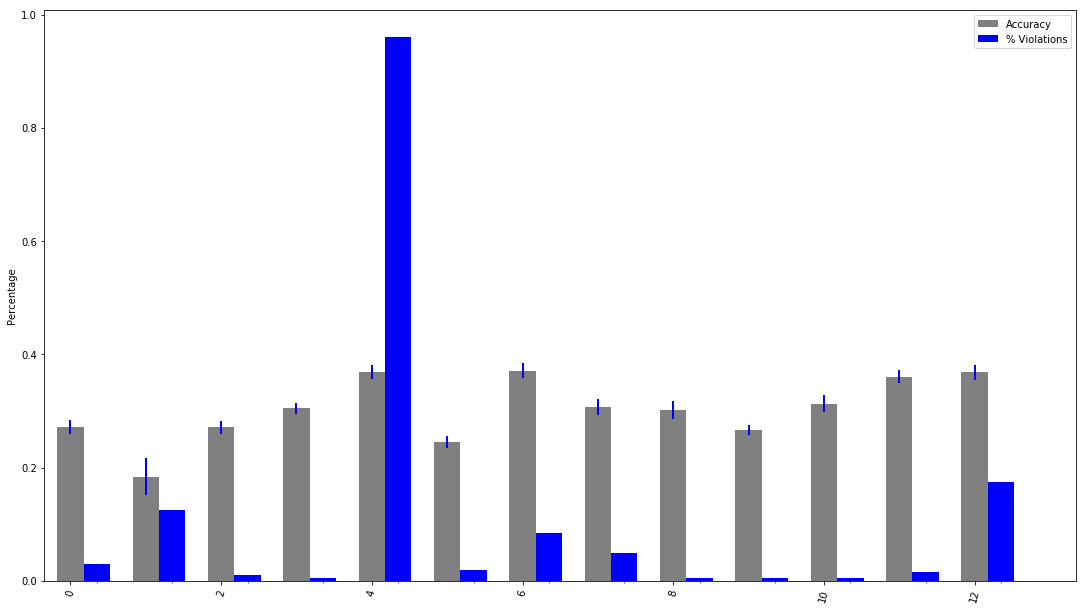

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_squared_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd

from pycausal import search as s

def get_CG(df, tetrad):
    tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)
    #tetrad.run(algoId = 'gfci', dfs = df, testId = 'bdeu', scoreId = 'bdeu', dataType = 'discrete',
    #       structurePrior = 1.0, samplePrior = 1.0, maxDegree = 3, faithfulnessAssumed = True, verbose = True)


    return tetrad.getTetradGraph()

def get_MB(graph, var, pc):
    parents = set()
    for i in pc.extractTetradGraphEdges(graph):
        if i[-1] == var and i[3:5] == '->':
            parents.add(i[0])
        if i[0] == var and i[3:5] == '->':
            parents.add(i[-1])
    return parents

from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm(java_max_heap_size = '5000M')
tetrad = s.tetradrunner()
def run_models(models, model_names, x, y, num_folds=40):
    violations = np.zeros(len(models))
    violation_mean = np.zeros((len(models), num_folds))
    mean = np.zeros((len(models), num_folds))
    mean2 = np.zeros((len(models), num_folds)) # used to store our secondary metric
    
    skf = StratifiedKFold(n_splits=num_folds)
    fold = 0
    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        for idx, model in enumerate(models):
            model.fit(x_train, y_train)
            original_df = pd.DataFrame(x_test, columns = ['a', 'b', 'c', 'd', 'e', 'f'])

            original_targets = pd.DataFrame(y_test, columns = ['g'])
            original_df = original_df.join(original_targets)
            test_df = pd.DataFrame(x_test, columns = ['a', 'b', 'c', 'd', 'e', 'f'])
            test_targets = pd.DataFrame(model.predict(x_test), columns = ['g'])
            test_df = test_df.join(test_targets)
            #print(get_MB(get_CG(test_df), 'g'))
            print("Error:", model_names[idx], accuracy_score(y_test, model.predict(x_test)))
            
            
            mean[idx][fold] = accuracy_score(y_test, model.predict(x_test))
            mean2[idx][fold] = mean_squared_error(y_test, model.predict(x_test))
            
            setA = get_MB(get_CG(original_df, tetrad), 'g', pc)
            setB = get_MB(get_CG(test_df, tetrad), 'g', pc)
            #assert(setA == {'f'})
            violation_mean[idx][fold] = len(setA.difference(setB)) + len(setB.difference(setA))
            if setA != setB:
                print("Violation:", setA , setB, 'g', pc)
                violations[idx] += 1
            
            #pc.stop_vm()
        fold += 1
    
    print("Violations = ", violations)
    
    metric = []
    metric_err = []
    viol = []
    viol_err = []
    
    #normalize the violations for prettier graphing.
    #also violations are always positive, so just divide by max.
    violation_mean = violation_mean / np.max(violation_mean)
    
    for i in range(len(violations)):
        print("Model_name = ", model_names[i], "Violations = ", violations[i])
        print("Average_violations = ", np.mean(violation_mean[i]), np.std(violation_mean[i]))
        print("Accuracy = ", np.mean(mean[i]), np.std(mean[i]), "MSE = ", np.mean(mean2[i]), np.std(mean2[i]),)
        metric.append(np.mean(mean[i]))
        metric_err.append(np.std(mean[i]))
        viol.append(np.mean(violation_mean[i]))
        
        viol_err.append(np.std(violation_mean[i]))
    print(np.array(metric), 
             np.array(metric_err), 
             np.array(viol), 
             np.array(viol_err))    
    
    bar_plot(model_names, 
             np.array(metric), 
             np.array(metric_err), 
             np.array(viol), 
             np.array(viol_err))
    return 

X = df[['a', 'b', 'c', 'd', 'e', 'f']].values
y = df['g'].values

models = [LogisticRegression(), 
          Perceptron(),  
          DecisionTreeClassifier(),
          LinearSVC(),
          GaussianNB(),
          BernoulliNB(),
          LinearDiscriminantAnalysis(),
          RandomForestClassifier(),
          ExtraTreesClassifier(),
          AdaBoostClassifier(),
          BaggingClassifier(),
          GradientBoostingClassifier(),
          MLPClassifier()
         ]
model_names = ['LogisticRegression()', 
          'Perceptron()',  
          'DecisionTreeClassifier()',
          'LinearSVC()',
          'GaussianNB()',
          'BernoulliNB()',
          'LinearDiscriminantAnalysis()',
          'RandomForestClassifier()',
          'ExtraTreesClassifier()', 
          'AdaBoostClassifier()',
          'BaggingClassifier()',
          'GradientBoostingClassifier()',
          'MLPClassifier()'
         ]

run_models(models,model_names, X,y)

['boo', 'hoo', 'hoo2']


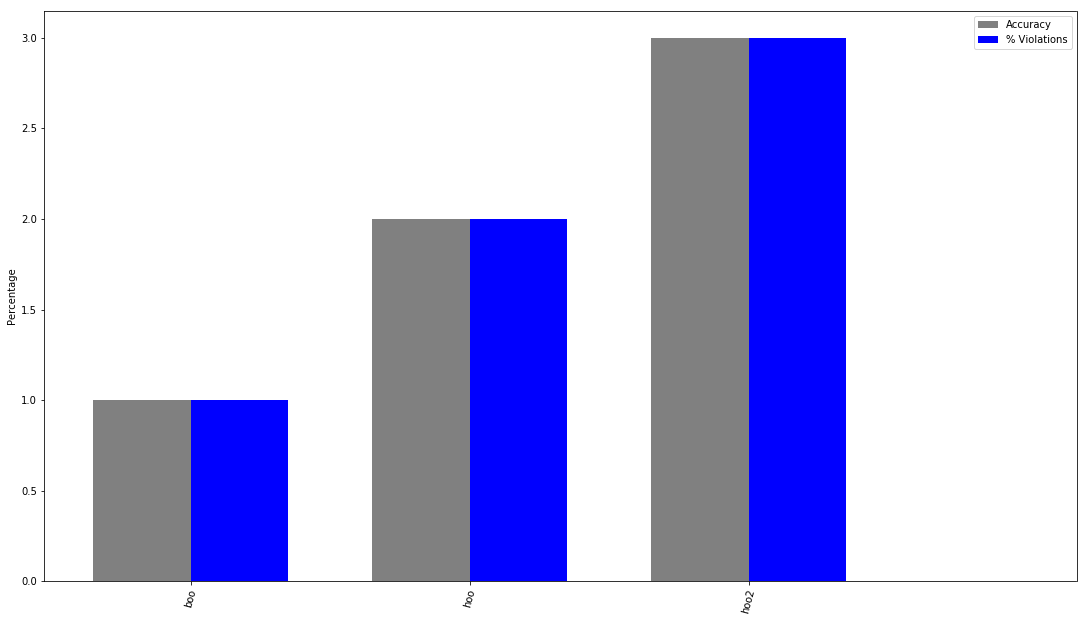

In [15]:
def bar_plot(x_ax, val1, val1std, val2, val2std):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ## the data
    N = len(x_ax)

    ## necessary variables
    ind = np.arange(N)                # the x locations for the groups
    width = 0.35                      # the width of the bars
    fig.set_size_inches(18.5, 10.5)
    ## the bars
    rects1 = ax.bar(ind, val1, width,
                    color='gray',
                    yerr=val1std,
                    error_kw=dict(elinewidth=2,ecolor='blue'))

    rects2 = ax.bar(ind+width, val2, width,
                        color='blue',
                        #yerr=val2std,
                        error_kw=dict(elinewidth=2,ecolor='gray'))

    # axes and labels
    ax.set_xlim(-width,len(ind)+width)
    #ax.set_ylim(0,45)
    ax.set_ylabel('Percentage')
    ax.set_title('')
    plt.xticks(ind + width / 2, x_ax, rotation=75, size = )
    ## add a legend
    ax.legend( (rects1[0], rects2[0]), ('Accuracy', '% Violations') )
    fig.savefig("violations.pdf", bbox_inches='tight')
    plt.show()


bar_plot(['boo', 'hoo', 'hoo2'], [1, 2, 3], [0, 0, 0], [1, 2, 3], [0,0,0])